## Task 1: Data Exploration and Understanding 

In [65]:
# all the necessary libraries have been imported here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import time
import nltk
import matplotlib.pyplot as plt

# Sklearn libraries for machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



# NLTK libraries for text processing (lemmatization, stemming, stopwords, POS tagging)
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag

# Download necessary NLTK resources for text processing
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Open Multilingual Wordnet
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger for part-of-speech tagging
nltk.download('tagsets_json')  # Tagset resource



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets_json to
[nltk_data]     C:\Users\NikoBelin\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets_j

True

In [66]:
# Train and test data loaded here
df_train = pd.read_excel("Assignment 1 Data/AI_vs_huam_train_dataset.xlsx")
df_test = pd.read_csv("Assignment 1 Data/final_test_data.csv")

In [67]:
# Description of the train data set which contains the count and other relevant info
df_train.describe()

,label
count,3728.000000
mean,0.500000
std,0.500067
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [68]:
# label category count of train data
df_train["label"].value_counts()

label
0    1864
1    1864
Name: count, dtype: int64

In [69]:
# sample text of the first 10 data in the train data
df_train.head(10)

,essay,label
0,International sports events require the most w...,0
1,Globalisation has become a significant aspect ...,0
2,There is an ever-increasing number of bullying...,0
3,"It is commonly believed, that companies should...",0
4,Despite knowing about the adverse effects of c...,0
5,These days the space exploration is not just a...,0
6,Regarding the suggestions that governments sho...,0
7,The ability to associate at school has been a ...,0
8,"It is true that today, people tend to give bir...",0
9,Weather to have children or not is one of the ...,0


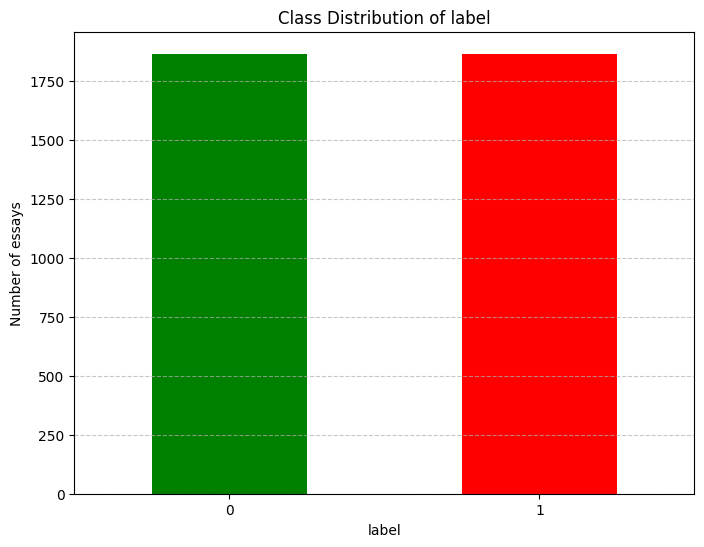

In [70]:
# A visualization of the distribution of the label category

# Count class occurrences in label category
class_counts = df_train['label'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['green', 'red'])  # Customize colors as needed
plt.title("Class Distribution of label")
plt.xlabel("label")
plt.ylabel("Number of essays")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Task 2: Text Preprocessing

<span style="color:blue; font-size:20px;">Removing stopWords.</span>


In [71]:


def remove_stopwords(essay):
    """
    Cleans and processes an essay string.

    This function takes a raw essay  and performs several text cleaning steps:
    1. Checks if the input is a string; returns an empty string otherwise.
    2. Defines a list of common English stopwords and additional custom words to remove.
    3. Removes all punctuation from the tweet.
    4. Removes the defined stopwords from the tweet.
    5. Joins the remaining words back into a single cleaned string.

    Args:
        essay (str): The input tweet string to be processed.

    Returns:
        str: The cleaned essay string with punctuation and stopwords removed,
             or an empty string if the input was not a string.
    """
    # Handle non-string values gracefully
    if not isinstance(essay, str):
        return ""

    # Define a set of stopwords, including standard English stopwords and some custom ones
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

    # Remove punctuation from the tweet
    essay = essay.lower()
    nopunc = ''.join([char for char in essay if char not in string.punctuation])

    # Remove stopwords and join the words back into a string
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])



df_train["clean_essay"] = df_train["essay"].apply(remove_stopwords) #applying stopwords to the train data
df_test["clean_essay"] = df_test["essay"].apply(remove_stopwords)    #applying stopwords to the test data


#show the first 5 data of the train data with the new column for clean essays
df_train.head(5) 



,essay,label,clean_essay
0,International sports events require the most w...,0,international sports events require welltraine...
1,Globalisation has become a significant aspect ...,0,globalisation become significant aspect world’...
2,There is an ever-increasing number of bullying...,0,everincreasing number bullying activities nume...
3,"It is commonly believed, that companies should...",0,commonly believed companies dress code policy ...
4,Despite knowing about the adverse effects of c...,0,despite knowing adverse effects climate change...


In [72]:
#Display to show the comparison of the first 5 data before and after applying stopwords in clean data.(Examples)
df_train[['essay','clean_essay']].head(5)




,essay,clean_essay
0,International sports events require the most w...,international sports events require welltraine...
1,Globalisation has become a significant aspect ...,globalisation become significant aspect world’...
2,There is an ever-increasing number of bullying...,everincreasing number bullying activities nume...
3,"It is commonly believed, that companies should...",commonly believed companies dress code policy ...
4,Despite knowing about the adverse effects of c...,despite knowing adverse effects climate change...


In [73]:
# Tokenize each tweet by splitting on blank or space.
original_tokenized_essay = df_train['essay'].apply(lambda tweet: tweet.split()) #spliting training text without applying stopwords.
clean_tokenized_essay = df_train['clean_essay'].apply(lambda tweet: tweet.split()) #spliting training text after applying stopwords.
clean_tokenized_test_essay = df_test['clean_essay'].apply(lambda tweet: tweet.split()) #splitting the test data.


df_train['clean_tokens'] = clean_tokenized_essay  #creating a column with name "clean tokens" in training data
df_test['clean_tokens'] = clean_tokenized_test_essay   #creating a column with name "clean tokens" in test data


# Flatten the list of token lists into a single list of tokens
all_old_tokens = [word for tokens in original_tokenized_essay for word in tokens]
all_new_tokens = [word for tokens in clean_tokenized_essay for word in tokens]



old_vocab = set(all_old_tokens)
new_vocab = set(all_new_tokens)

#showing the difference vocabulary size before and after applying stop word removal.
print("Vocabulary size before stopword removal:", len(old_vocab))
print("Vocabulary size after stopword removal:", len(new_vocab))

Vocabulary size before stopword removal: 42702
Vocabulary size after stopword removal: 26505


<span style="color:blue; font-size:20px;">Stemming and lemmitaization.</span>

In [74]:
# stemming and lemmitization

def preprocess_stem(tokens):
    """
    Apply Porter Stemming to a list of tokens.

    Args:
        tokens (list): A list of word tokens (already tokenized and stopword-removed)

    Returns:
        list: Stemmed tokens
    """
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]


# Helper: Map POS tag to WordNet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default

# Main Lemmatization Function
def preprocess_lematise(tokens):
    """
    Apply lemmatization with POS tagging to a list of tokens.

    Args:
        tokens (list): Tokenized words (already cleaned and stopword-removed)

    Returns:
        list: Lemmatized tokens
    """
    lemmatizer = WordNetLemmatizer()
    pos_tags = pos_tag(tokens)
    return [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in pos_tags
    ]

df_train["stemmed_tokens"] = df_train["clean_tokens"].apply(preprocess_stem)      #applying stemming on training data
df_train["lemmatized_tokens"] = df_train["clean_tokens"].apply(preprocess_lematise)    #applying lemitiaztion on training data



df_test["lemmatized_tokens"] = df_test["clean_tokens"].apply(preprocess_lematise)     #applying lemitiaztion on test data






In [75]:
# A comparison of clean token,stemmed tokens and lemitized tokens in the firt 10 data in the training data.
df_train[['clean_tokens','stemmed_tokens','lemmatized_tokens']].head(10)



,clean_tokens,stemmed_tokens,lemmatized_tokens
0,"[international, sports, events, require, wellt...","[intern, sport, event, requir, welltrain, athl...","[international, sport, event, require, welltra..."
1,"[globalisation, become, significant, aspect, w...","[globalis, becom, signific, aspect, world’, mo...","[globalisation, become, significant, aspect, w..."
2,"[everincreasing, number, bullying, activities,...","[everincreas, number, bulli, activ, numer, sch...","[everincreasing, number, bullying, activity, n..."
3,"[commonly, believed, companies, dress, code, p...","[commonli, believ, compani, dress, code, polic...","[commonly, believe, company, dress, code, poli..."
4,"[despite, knowing, adverse, effects, climate, ...","[despit, know, advers, effect, climat, chang, ...","[despite, know, adverse, effect, climate, chan..."
5,"[days, space, exploration, imagination, since,...","[day, space, explor, imagin, sinc, human, be, ...","[day, space, exploration, imagination, since, ..."
6,"[regarding, suggestions, governments, offord, ...","[regard, suggest, govern, offord, tuition, sub...","[regard, suggestion, government, offord, tuiti..."
7,"[ability, associate, school, great, concern, o...","[abil, associ, school, great, concern, owe, as...","[ability, associate, school, great, concern, o..."
8,"[true, today, people, tend, give, birth, older...","[true, today, peopl, tend, give, birth, older,...","[true, today, people, tend, give, birth, older..."
9,"[weather, children, one, important, questions,...","[weather, children, one, import, question, you...","[weather, child, one, important, question, you..."


## Task 3: Feature Extraction 

<span style="color:blue; font-size:20px;">All other works used the lemitized tokens</span>


In [76]:
#join the token back to form text for both train and test data.
df_train['lemmatized_text'] = df_train['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))
df_test['lemmatized_text'] = df_test['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))


#Initialize most important component in the training data(preparing for feature extraction)
X = df_train["lemmatized_text"]
y = df_train["label"]


# Split training data into train and validation sets

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


#use the count vectorizer to extract features.
vectorizer = CountVectorizer(ngram_range=(1, 2),max_features=5000,min_df=5,max_df=0.8,)
X_train_count = vectorizer.fit_transform(X_train)
X_val_count = vectorizer.transform(X_val)

<span style="color:blue; font-size:20px;">Using the TFIDF vectorizer (All other works will be done using the TFIDF vectorizer)</span>


In [77]:

#use the TFIDF vectorizer to vectorise.


vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_features=5000,min_df=5,max_df=0.8,)
X_train_tfid = vectorizer.fit_transform(X_train)
X_val_tfid = vectorizer.transform(X_val)


X_test_tfid =vectorizer.transform(df_test['lemmatized_text'])





## Task 4: Machine Learning Model Development A -  (SVM calssifiers)

<span style="color:blue; font-size:20px;">Building an svm classifier with Kernel ="linear"</span>

In [78]:
# Train svm model
svm_linear = SVC(kernel='linear', C=1.0, probability=True)  # C=1.0 is default
svm_linear.fit(X_train_tfid, y_train)

y_pred_linear = svm_linear.predict(X_val_tfid)




<span style="color:blue; font-size:20px;">Performance metrics of svm classifier with kernel = "linear"</span>


In [79]:

#print the preciion accuracy and other reports
print(metrics.classification_report(y_val, y_pred_linear))
# Print the confusion matrix
print("The confusion matrix is :\n",  metrics.confusion_matrix(y_val,y_pred_linear))




              precision    recall  f1-score   support

           0       0.98      0.97      0.98       373
           1       0.97      0.98      0.98       373

    accuracy                           0.98       746
   macro avg       0.98      0.98      0.98       746
weighted avg       0.98      0.98      0.98       746

The confusion matrix is :
 [[363  10]
 [  8 365]]


C:\Users\NikoBelin\AppData\Local\Temp\ipykernel_23480\1767758237.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


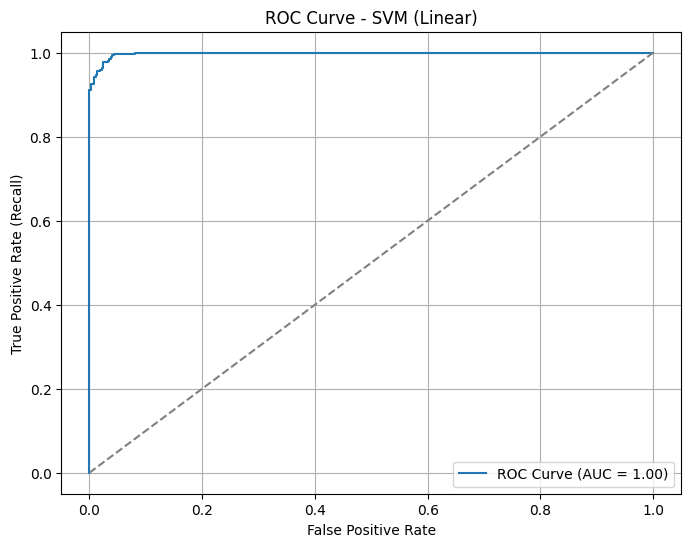

In [81]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities (scores) for the positive class
y_scores_linear = svm_linear.predict_proba(X_val_tfid)[:, 1]  # Probabilities for class 1

# --- ROC Curve ---
fpr_linear, tpr_linear, _ = roc_curve(y_val, y_scores_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, label=f'ROC Curve (AUC = {roc_auc_linear:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - SVM (Linear)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()










<span style="color:blue; font-size:20px;">Building an svm classifier with Kernel ="rbf"</span>

In [82]:
svm_rbf = SVC(kernel='rbf', C=1.0, probability=True)  # gamma='scale' is default
svm_rbf.fit(X_train_tfid, y_train)

y_pred_rbf = svm_rbf.predict(X_val_tfid)



<span style="color:blue; font-size:20px;">Performance metrics of svm classifier with kernel = "rbf"</span>

In [83]:
print(metrics.classification_report(y_val, y_pred_rbf))
# Print the confusion matrix
print("The confusion metrics is :\n", metrics.confusion_matrix(y_val,y_pred_rbf))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       373
           1       0.95      0.94      0.94       373

    accuracy                           0.94       746
   macro avg       0.94      0.94      0.94       746
weighted avg       0.94      0.94      0.94       746

The confusion metrics is :
 [[354  19]
 [ 23 350]]


C:\Users\NikoBelin\AppData\Local\Temp\ipykernel_23480\968819893.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


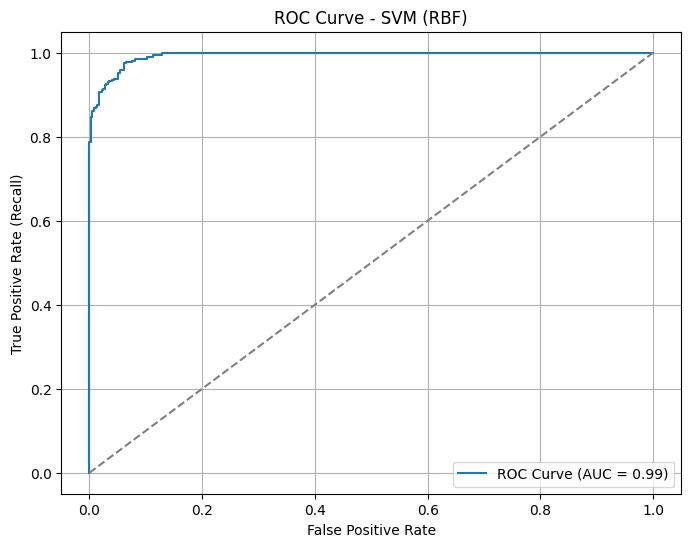

In [84]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities (scores) for the positive class
y_scores_rbf = svm_rbf.predict_proba(X_val_tfid)[:, 1]  # Probabilities for class 1

# --- ROC Curve ---
fpr_rbf, tpr_rbf, _ = roc_curve(y_val, y_scores_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rbf, tpr_rbf, label=f'ROC Curve (AUC = {roc_auc_rbf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - SVM (RBF)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




## Task 4: Machine Learning Model Development B - Decision tree classifiers

<span style="color:blue; font-size:20px;">Building an DecisionTree classifier with criterion ="gini"</span>

In [85]:
# decision tree

tree_gini = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
tree_gini.fit(X_train_tfid, y_train)
y_pred_gini = tree_gini.predict(X_val_tfid)

<span style="color:blue; font-size:20px;">Performance metrics of Decision tree classifier with Criterion = "gini"</span>

In [86]:
print(metrics.classification_report(y_val, y_pred_gini))
# Print the confusion matrix
print("The confusion matrix is :\n", metrics.confusion_matrix(y_val,y_pred_gini))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       373
           1       0.92      0.90      0.91       373

    accuracy                           0.91       746
   macro avg       0.91      0.91      0.91       746
weighted avg       0.91      0.91      0.91       746

The confusion matrix is :
 [[344  29]
 [ 38 335]]


C:\Users\NikoBelin\AppData\Local\Temp\ipykernel_23480\1927157910.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


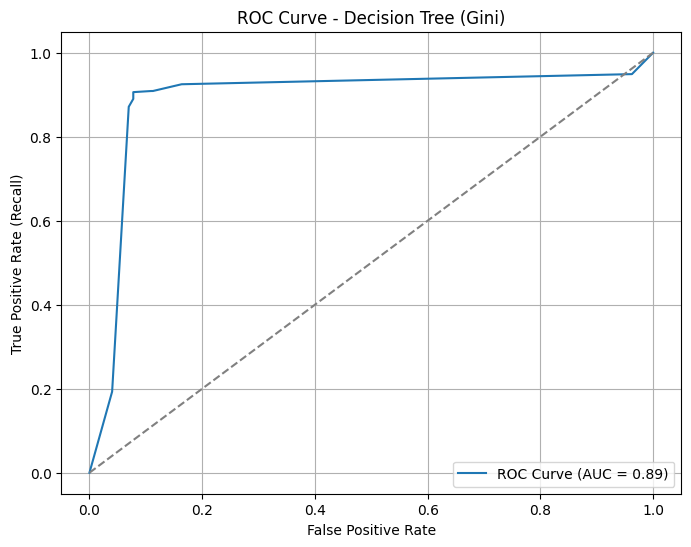

In [87]:
# Get predicted probabilities for the positive class (class 1)
y_scores_gini = tree_gini.predict_proba(X_val_tfid)[:, 1]

# --- ROC Curve ---
fpr_gini, tpr_gini, _ = roc_curve(y_val, y_scores_gini)
roc_auc_gini = auc(fpr_gini, tpr_gini)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gini, tpr_gini, label=f'ROC Curve (AUC = {roc_auc_gini:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Decision Tree (Gini)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



<span style="color:blue; font-size:20px;">Building an DecisionTree classifier with criterion ="entropy"</span>

In [88]:
tree_entropy = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
tree_entropy.fit(X_train_tfid, y_train)
y_pred_entropy = tree_entropy.predict(X_val_tfid)


<span style="color:blue; font-size:20px;">Performance metrics of Decision tree classifier with Criterion = "entropy"</span>

In [89]:
print(metrics.classification_report(y_val, y_pred_entropy))
# Print the confusion matrix
print("The confusion matrix is :\n", metrics.confusion_matrix(y_val,y_pred_entropy))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       373
           1       0.93      0.91      0.92       373

    accuracy                           0.92       746
   macro avg       0.92      0.92      0.92       746
weighted avg       0.92      0.92      0.92       746

The confusion matrix is :
 [[347  26]
 [ 32 341]]


C:\Users\NikoBelin\AppData\Local\Temp\ipykernel_23480\3518752989.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


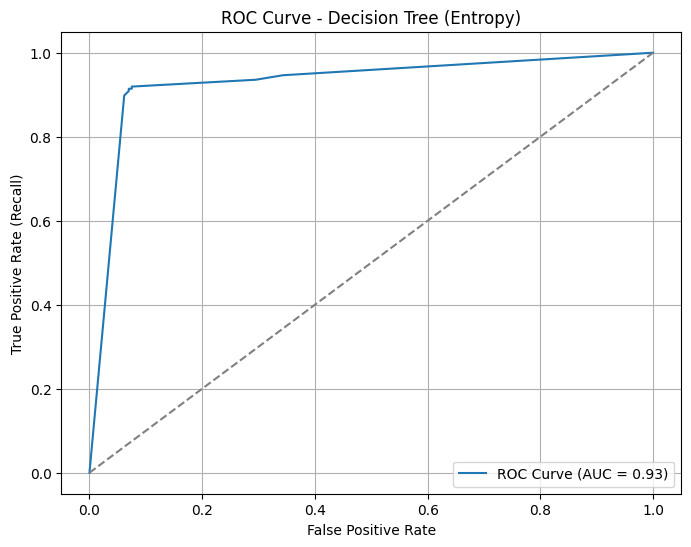

In [90]:
# Get predicted probabilities for the positive class
y_scores_entropy = tree_entropy.predict_proba(X_val_tfid)[:, 1]

# --- ROC Curve ---
fpr_entropy, tpr_entropy, _ = roc_curve(y_val, y_scores_entropy)
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)

plt.figure(figsize=(8, 6))
plt.plot(fpr_entropy, tpr_entropy, label=f'ROC Curve (AUC = {roc_auc_entropy:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Decision Tree (Entropy)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


 ## Task 5: A table showing the different metrics of all classifier used.

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

models = {
    "SVM (Linear)": y_pred_linear,
    "SVM (RBF)": y_pred_rbf,
    "Decision Tree (Gini)": y_pred_gini,
    "Decision Tree (Entropy)": y_pred_entropy
}

comparison_table = {
    name: get_metrics(y_val, pred)
    for name, pred in models.items()
}

import pandas as pd
comparison_df = pd.DataFrame(comparison_table).T
print(comparison_df)


                         Accuracy  Precision    Recall  F1 Score
SVM (Linear)             0.975871   0.973333  0.978552  0.975936
SVM (RBF)                0.943700   0.948509  0.938338  0.943396
Decision Tree (Gini)     0.910188   0.920330  0.898123  0.909091
Decision Tree (Entropy)  0.922252   0.929155  0.914209  0.921622


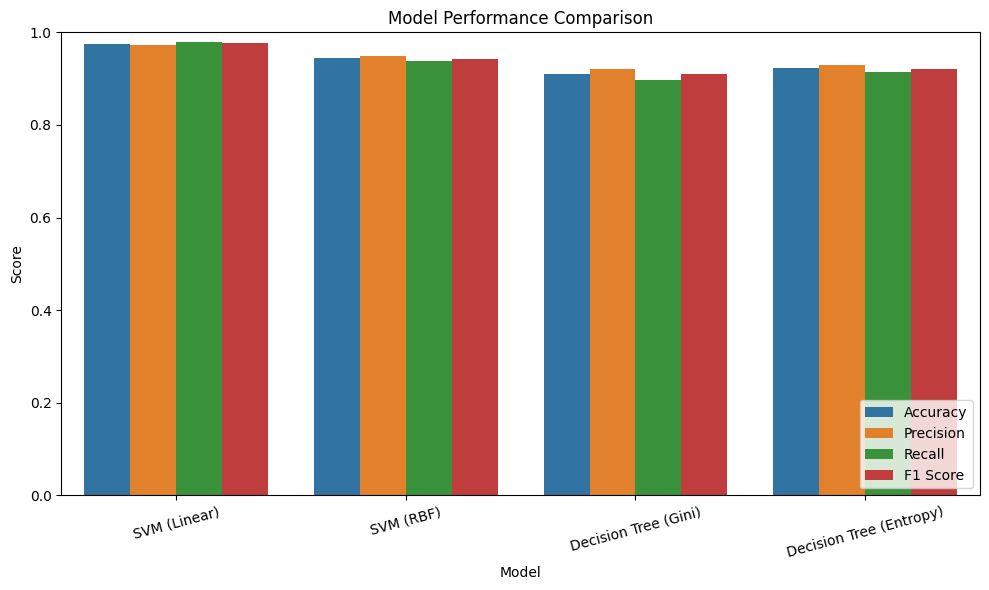

In [92]:
#A bar graph showing all  classifiers.

def get_scores(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

results = {
    "SVM (Linear)": get_scores(y_val, y_pred_linear),
    "SVM (RBF)": get_scores(y_val, y_pred_rbf),
    "Decision Tree (Gini)": get_scores(y_val, y_pred_gini),
    "Decision Tree (Entropy)": get_scores(y_val, y_pred_entropy)
}



# Convert nested dict to tidy DataFrame
df_scores = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
df_melted = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')




plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title("Model Performance Comparison")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## Task 6 : Error Analysis and summary



<p style="font-size:24px">
Among the four classifiers evaluated, the <strong>the SVM with a linear kernel</strong> achieved the highest performance across all metrics, with an accuracy of <strong>97.6%</strong>, precision of <strong>97.3%</strong>, recall of <strong>97.9%</strong>, and F1 score of <strong>97.6%</strong>. This indicates that it made very few misclassification errors and generalizes well to the validation data.
The <strong>SVM with RBF kernel</strong> also performed strongly (<strong>94.4% accuracy</strong>), though slightly behind the linear model, suggesting it may not have captured the data structure as effectively in this case.
Between the two decision tree models, the <strong>entropy-based tree</strong> outperformed the <strong>Gini-based tree</strong>, achieving <strong>92.2% accuracy</strong> versus <strong>91.0%</strong>, along with better precision, recall, and F1 scores.
Overall, the results suggest that <strong>linear SVM is the most reliable choice</strong> for this task, while the entropy-based decision tree may be a reasonable alternative when <em>interpretability</em> is important. With this result we can best say that the SVM performs better in binary classification task than the Decision tree.
</p>


## Task 7: Using the best classiifer (SVM with kernel = linear) to predict labels for our test data.

In [93]:
#predicting the labels for the test data using the svm classifier with kernel being linear
y_test_predict = svm_linear.predict(X_test_tfid)
df_test['label'] = y_test_predict  # overwrites or fills in the label column

#saving the excel file with the updated label
df_test[['essay', 'label']].to_csv("svm_test_predictions.csv", index=False)
